# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [6]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


1. Импортируйте модель данных "Ирисы Фишера".

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

2. Выполните нормализацию данных

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_iris_norm = df_iris.copy()
df_iris_norm[iris.feature_names] = scaler.fit_transform(df_iris[iris.feature_names])

print(df_iris_norm.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data  # только признаки

# Скалируем из-за масштаба(у дбскан с ним проблемы)
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

print(labels)
print("------------")

df = pd.DataFrame(X, columns=iris.feature_names) # наши результаты
df["cluster"] = labels

# Посмотрим итоговое распределение
print(df["cluster"].value_counts())

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
------------
cluster
 1    78
 0    46
-1    26
Name: count, dtype: int64


4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

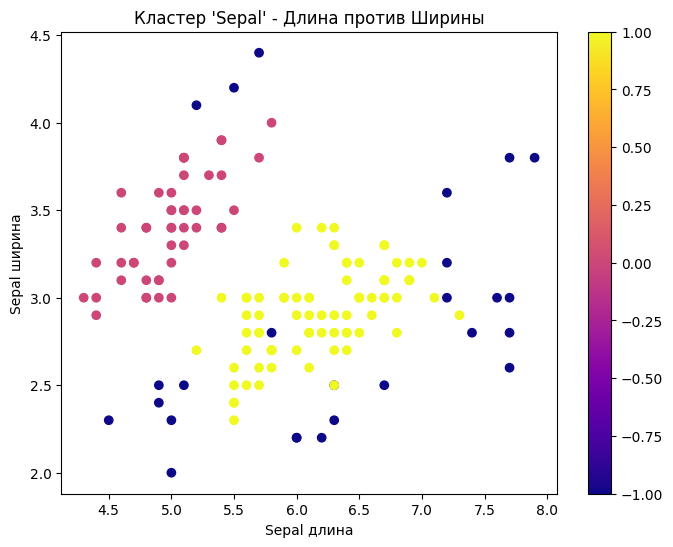

In [29]:
df_iris['cluster'] = labels

plt.figure(figsize=(8, 6))
plt.scatter(
    df_iris["sepal length (cm)"],
    df_iris["sepal width (cm)"],
    c=df_iris["cluster"],
    cmap="plasma"
)
plt.title("Кластер 'Sepal' - Длина против Ширины")
plt.xlabel("Sepal длина")
plt.ylabel("Sepal ширина")
plt.colorbar()
plt.show()

5. Сделайте вывод

Вывод: В ходе работы выполнена кластеризация данных «Ирисы Фишера» с помощью алгоритма DBSCAN. После нормализации и подбора параметров удалось выделить несколько кластеров, соответствующих видам ирисов. Алгоритм показал эффективность в обнаружении плотных групп без заранее заданного количества кластеров.

## Вопросы

1. В чем состоит задача кластеризации?
2. Для каких целей используется кластеризацияия?
3. Алгоритм кластеризации Ллойда.
4. Как выбрать количество кластеров для алгоритма K-средних
5. Алгоритм DBSCAN